# PAN Card Tampering Detection

The purpose of this project is to detect tampering of Pan Card using **computer vision**. this project will help different organization in detecting whether the ID i.e. Pan Card provided to them by their employees or customers or anyone is orginal or not.

For this project we will calculate Structural Similarity of orginal PAN card and the PAN uploaded by users.

In [27]:
# import the necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import imutils
from PIL import Image
import requests

### Loading orignal and user provided images.

In [28]:
# Open image and Display
original = Image.open('../sample_data/original.jpg')
tampered = Image.open('../sample_data/tampered.jpg')

### Here, we checked the format and size of the original and tampered image.

In [29]:
# The file format of the source file.
print("Original image format: ", original.format)
print("Tampered image format: ", tampered.format)

# Image size in pixels. The size is given as a 2-tuple (width, height).
print("Orginal image size: ", original.size)
print("Tampered image size: ", tampered.size)

Original image format:  JPEG
Tampered image format:  JPEG
Orginal image size:  (250, 160)
Tampered image size:  (250, 160)


### Converting the size of tampered and original image

In [30]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('../image/original.png') # Save image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('../image/tampered.png') # Save image

(250, 160)
(250, 160)


### Change image type if required from png to jpeg

In [31]:
# Change image type if required from png to jpeg
# tampered = Image.open('../image/tampered.png')
# tampered.save('../image/tampered.jpeg', format='jpeg') # Can do png to jpeg

### Original PAN card image used for comparision.

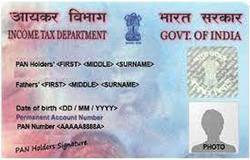

In [32]:
# Display original image
original

### User provided image which will be compared with PAN card.

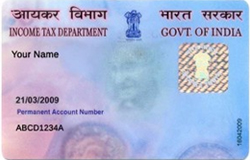

In [33]:
# Display user given image
tampered

### Reading images using opencv.

In [34]:
# Load the two input images
original = cv2.imread('../image/original.png')
tampered = cv2.imread('../image/tampered.png')

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the colored images also colored images are bit complex to understand by machine because they have 3 channel while grayscale has only 1 channel.

In [35]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

##### Structural Similarity Index help us to determine exacly where in terms of x,y co-ordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower SSIM score lower is the similarity.

In [37]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2952677730856737


##### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transform the grayscale image into a binary image using a mathematical formula.

##### Find contours works on binary image and retrieve the contours. This contours are a useful tool for shape analysis and recognition. Grab contours grabs the appropriate value of the contours.

In [43]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

##### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box input images to represent where the two images are different or not.

In [44]:
# Loop over the contours
for c in cnts:
    # Applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x,y), (x + w, y + h), (0, 0, 255), 2)

Orginal Format Image


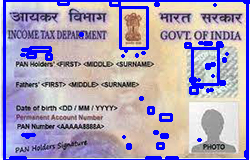

In [45]:
# Display original image with contour
print("Orginal Format Image")
Image.fromarray(original)

Tampered Format Image


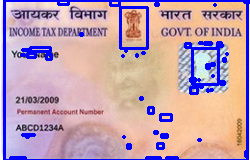

In [46]:
# Display tampered image with contour
print("Tampered Format Image")
Image.fromarray(tampered)

Different Image


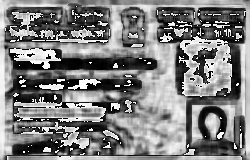

In [47]:
# Display differece image with black
print("Different Image")
Image.fromarray(diff)

Threshold Image


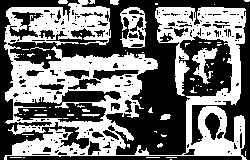

In [48]:
# Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

# Summary

Finding out structuralsimilarity of the images helped us in finding the difference or similarity in the shpe of the images.
Similarity, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As, our SSIM is ~ 29.52% we can say that the image user provided is fake or tempared.

Finally we visualized the difference and similarities between the images using by displaying the images with contours, difference and threshold.

# Scope

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like Adhar, Voter ID, etc